<a href="https://colab.research.google.com/github/mahluwal/Tensorflow/blob/master/dnn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mahluwal/Data1/main/housing.data", sep = "\s+", header = None, names = column_names)

In [4]:
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [5]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = df['MEDV']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [11]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
6/6 [==============================] - 0s 5ms/step - loss: 584.4471 - mse: 584.4471 - mae: 22.3415 - val_loss: 557.2640 - val_mse: 557.2639 - val_mae: 22.1186
Epoch 2/150
6/6 [==============================] - 0s 5ms/step - loss: 579.6429 - mse: 579.6429 - mae: 22.2518 - val_loss: 552.5993 - val_mse: 552.5993 - val_mae: 22.0261
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 574.2116 - mse: 574.2116 - mae: 22.1512 - val_loss: 547.6440 - val_mse: 547.6440 - val_mae: 21.9272
Epoch 4/150
6/6 [==============================] - 0s 5ms/step - loss: 568.6683 - mse: 568.6682 - mae: 22.0470 - val_loss: 542.1567 - val_mse: 542.1567 - val_mae: 21.8170
Epoch 5/150
6/6 [==============================] - 0s 5ms/step - loss: 562.3557 - mse: 562.3557 - mae: 21.9272 - val_loss: 536.2817 - val_mse: 536.2817 - val_mae: 21.6985
Epoch 6/150
6/6 [==============================] - 0s 5ms/step - loss: 555.5739 - mse: 555.5739 - mae: 21.7984 - val_loss: 529.9294 - val_mse: 52

In [12]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


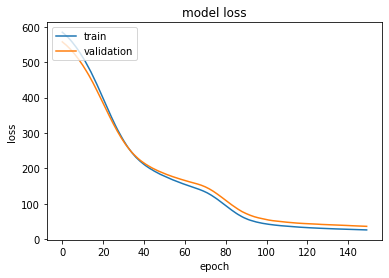

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

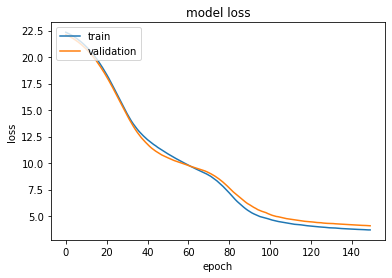

In [14]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: MEDV, Length: 167, dtype: float64

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.344114395529924

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

24.562008068395738

In [19]:
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
# taking root of mean squared error
sqrt(mse)

4.956007270817481